# Task 3: Heart Disease Prediction

## Objective
The objective of this task is to build a Logistic Regression model
to predict whether a person is at risk of heart disease
based on medical attributes.


# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


# Load Dataset

In [11]:
df= pd.read_csv("heart.csv")

In [13]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [14]:
df.shape

(920, 16)

# Data Cleaning
## 4.1 Convert Target Column

In [15]:
##Convert to binary:
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop("num", axis=1, inplace=True)


In [17]:
#df.head()

## 4.2 Remove Unnecessary Columns

In [18]:
df.drop(["id", "dataset"], axis=1, inplace=True)


In [22]:
#df.columns

## 4.3 Check Missing Values

In [23]:
df.isnull().sum()


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [24]:
df.dropna(inplace=True)


In [25]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis (EDA)
## 5.1 Target Distribution

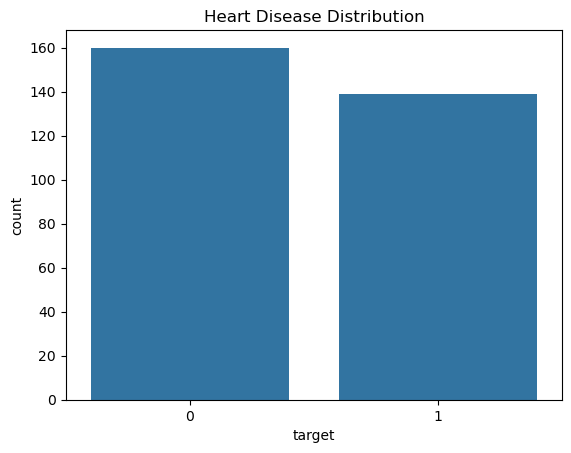

In [26]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()


## 5.2 Age vs Target

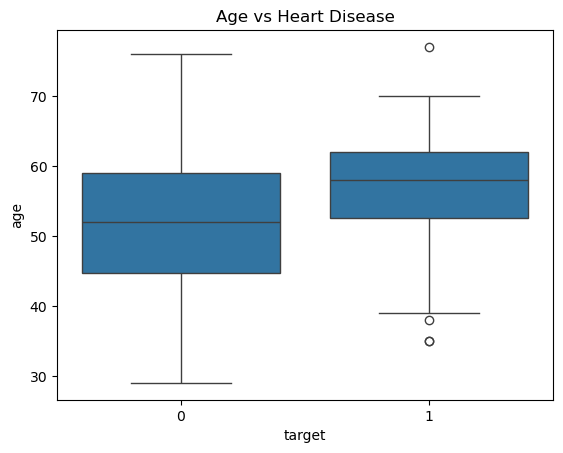

In [27]:
sns.boxplot(x="target", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()


## 5.3 Correlation Heatmap

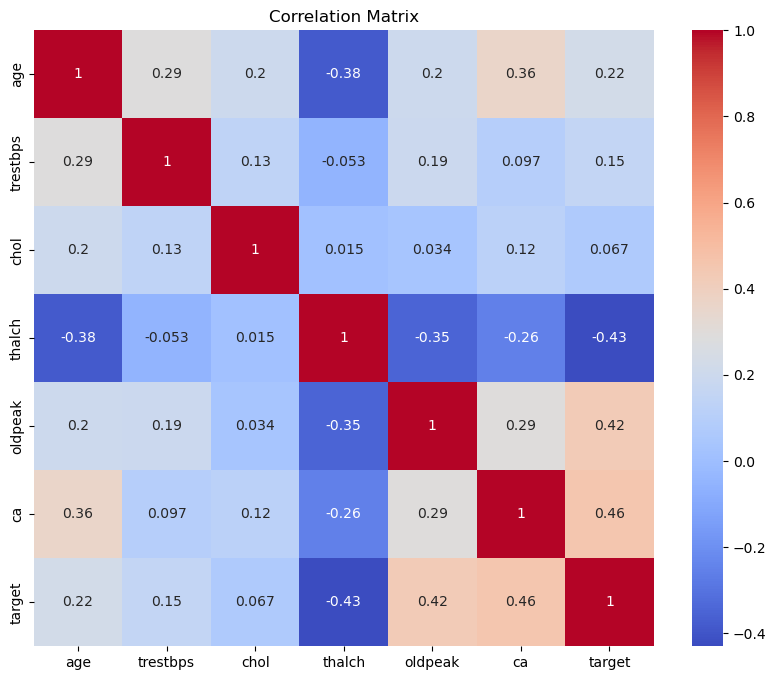

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Encode Categorical Variables

In [30]:
##Convert to numbers:
df = pd.get_dummies(df, drop_first=True)


In [32]:
##df

# Features & Target Separate

In [33]:
X = df.drop("target", axis=1)
y = df["target"]


# Train-Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Logistic Regression

In [35]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


# Predictions

In [36]:
y_pred = model.predict(X_test)


# Accuracy

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9166666666666666


# Confusion Matrix

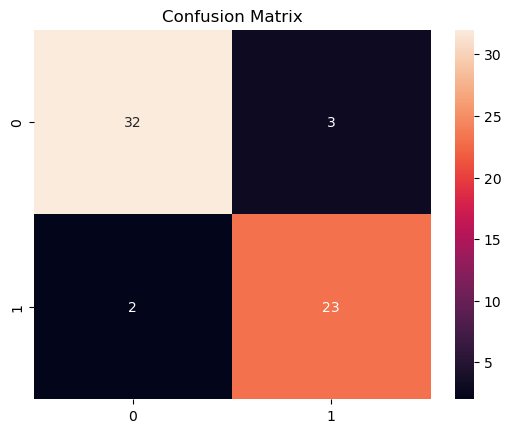

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


# ROC Curve

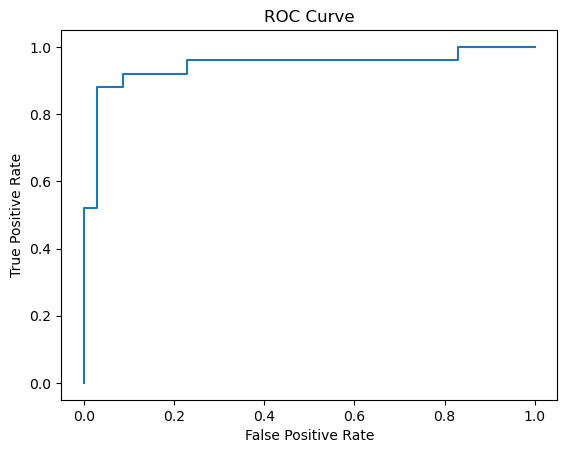

0.9440000000000001

In [39]:
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

roc_auc_score(y_test, y_prob)


# Feature Importance

In [40]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).head(10)


sex_Male                  1.150258
ca                        1.089806
exang_True                0.898320
thal_reversable defect    0.651278
slope_flat                0.549828
oldpeak                   0.353992
trestbps                  0.019070
chol                      0.003569
age                      -0.007527
thalch                   -0.018436
dtype: float64

## Final Insights

- Logistic Regression achieved an accuracy of 91.6%.
- Age, chest pain type, and cholesterol showed strong influence.
- ROC-AUC score 94% indicates good classification performance.
- The model can help in early detection of heart disease risk.
